In [3]:
import pandas as pd

In [4]:
referendum = pd.read_csv("data//referendum.csv", sep=";", header=0)
departments = pd.read_csv("data//departments.csv", sep=",", header=0)
regions = pd.read_csv("data//regions.csv", sep=",", header=0)

In [5]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           109 non-null    int64 
 1   region_code  109 non-null    object
 2   code         109 non-null    object
 3   name         109 non-null    object
 4   slug         109 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.4+ KB


In [6]:
departments.duplicated(["code"]).sum()

0

In [7]:
 """Merge regions and departments in one DataFrame.

    The columns in the final DataFrame should be:
    ['code_reg', 'name_reg', 'code_dep', 'name_dep']
"""
print(regions.head())
print(departments.head())
regions_and_departments = departments.merge(regions.rename(columns={"name":"name_reg", "code" : "code_reg"})[["name_reg", "code_reg"]],
                   how='left', 
                   left_on = 'region_code',
                   right_on='code_reg').rename(columns={"name":"name_dep", 
                                                        "code":"code_dep"}).drop(columns=["slug", "id", "region_code"])
regions_and_departments.head()

   id code        name        slug
0   1   01  Guadeloupe  guadeloupe
1   2   02  Martinique  martinique
2   3   03      Guyane      guyane
3   4   04  La Réunion  la reunion
4   5   06     Mayotte     mayotte
   id region_code code                     name                     slug
0   1          84   01                      Ain                      ain
1   2          32   02                    Aisne                    aisne
2   3          84   03                   Allier                   allier
3   4          93   04  Alpes-de-Haute-Provence  alpes de haute provence
4   5          93   05             Hautes-Alpes             hautes alpes


,code_dep,name_dep,name_reg,code_reg
0,01,Ain,Auvergne-Rhône-Alpes,84
1,02,Aisne,Hauts-de-France,32
2,03,Allier,Auvergne-Rhône-Alpes,84
3,04,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur,93
4,05,Hautes-Alpes,Provence-Alpes-Côte d'Azur,93


In [8]:
regions_and_departments.duplicated(["name_dep"]).sum()

0

In [9]:
referendum["Department code"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD',
       'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ'], dtype=object)

In [10]:
regions_and_departments["code_dep"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '971', '972',
       '973', '974', '976', '975', '977', '978', '984', '986', '987',
       '988', '989'], dtype=object)

In [11]:
regions_and_departments['code_dep'] = [ele.lstrip("0") for ele in regions_and_departments['code_dep']]

In [12]:
referendum.head()

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52


In [13]:
referendum_and_areas = referendum.merge(regions_and_departments, 
                 how='left', 
                 left_on='Department code',
                 right_on='code_dep')

In [14]:
dom_tom_list = ['ZA', 'ZB', 'ZC', 'ZD',
       'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ']
referendum_and_areas = referendum_and_areas.loc[(referendum_and_areas['Department code'].isin(dom_tom_list)) == 0]


In [41]:
referendum_and_areas

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B,code_dep,name_dep,name_reg,code_reg
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345,1,Ain,Auvergne-Rhône-Alpes,84
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108,1,Ain,Auvergne-Rhône-Alpes,84
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664,1,Ain,Auvergne-Rhône-Alpes,84
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684,1,Ain,Auvergne-Rhône-Alpes,84
4,1,AIN,6,Ambléon,105,17,1,35,52,1,Ain,Auvergne-Rhône-Alpes,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36560,95,VAL D'OISE,676,Villers-en-Arthies,382,64,5,87,226,95,Val-d'Oise,Île-de-France,11
36561,95,VAL D'OISE,678,Villiers-Adam,595,71,4,191,329,95,Val-d'Oise,Île-de-France,11
36562,95,VAL D'OISE,680,Villiers-le-Bel,13269,4083,224,5546,3416,95,Val-d'Oise,Île-de-France,11
36563,95,VAL D'OISE,682,Villiers-le-Sec,95,11,0,40,44,95,Val-d'Oise,Île-de-France,11


In [42]:
referendum_and_areas[referendum_and_areas["name_dep"]=="Normandie"]

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B,code_dep,name_dep,name_reg,code_reg


In [29]:
referendum_result_by_regions =referendum_and_areas[[
    'code_reg','name_reg', 'Registered', 'Abstentions', 'Null', 'Choice A', 'Choice B'
    ]].groupby(by=["name_reg", 'code_reg'], as_index=False).agg('sum').set_index("code_reg")

In [1]:
import geopandas as gpd

In [26]:
regions_geo = gpd.read_file("data//regions.geojson")


In [33]:
referendum_geo = referendum_result_by_regions.merge(regions_geo, left_on="code_reg", right_on="code")
referendum_geo = gpd.GeoDataFrame(data=referendum_geo)

In [34]:
referendum_geo.geometry

0     POLYGON ((3.36135 44.97141, 3.35453 44.95482, ...
1     POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...
2     MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48...
3     POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...
4     MULTIPOLYGON (((9.27103 41.36496, 9.26570 41.3...
5     POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...
6     POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...
7     POLYGON ((-1.11962 49.35557, -1.11503 49.36240...
8     MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45...
9     MULTIPOLYGON (((1.78613 42.57362, 1.78094 42.5...
10    MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46...
11    MULTIPOLYGON (((6.94833 44.65482, 6.95451 44.6...
12    POLYGON ((1.92215 48.45760, 1.92074 48.44775, ...
Name: geometry, dtype: geometry

<Axes: >

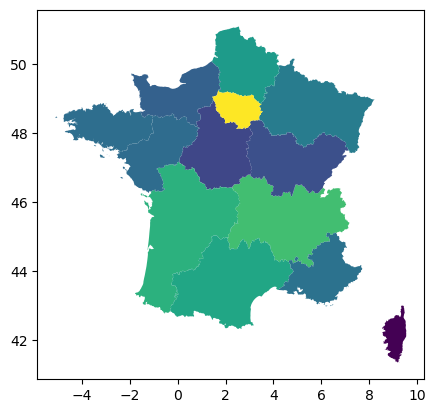

In [37]:
referendum_geo.plot("Choice A")


In [38]:
regions_geo = gpd.read_file("data//regions.geojson")
referendum_geo = referendum_result_by_regions.merge(regions_geo, left_on="code_reg", right_on="code")
referendum_geo = gpd.GeoDataFrame(data=referendum_geo)
referendum_geo["ratio"] = referendum_geo["Choice A"]/ (referendum_geo["Abstentions"] + referendum_geo["Choice A"] + referendum_geo["Choice B"])

In [44]:
referendum_geo.head()

,name_reg,Registered,Abstentions,Null,Choice A,Choice B,code,nom,geometry,ratio
0,Auvergne-Rhône-Alpes,5227873,909284,81817,1791857,2444915,84,Auvergne-Rhône-Alpes,"POLYGON ((3.36135 44.97141, 3.35453 44.95482, ...",0.348200
1,Bourgogne-Franche-Comté,1997925,358321,33671,668246,937687,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...",0.340203
2,Bretagne,2380594,364724,36077,944052,1035741,53,Bretagne,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48...",0.402664
3,Centre-Val de Loire,1801366,326560,28827,590890,855089,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",0.333358
4,Corse,220349,56696,2921,60917,99815,94,Corse,"MULTIPOLYGON (((9.27103 41.36496, 9.26570 41.3...",0.280171


In [45]:
referendum_geo[referendum_geo["name_reg"]=="Normandie"]

,name_reg,Registered,Abstentions,Null,Choice A,Choice B,code,nom,geometry,ratio
7,Normandie,2372779,426075,35513,816972,1094219,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",0.349542
